<a href="https://colab.research.google.com/github/harnalashok/classification/blob/main/airways_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# R code

In [29]:
install.packages("vcd")
install.packages("gridExtra")
install.packages("vcdExtra")
install.packages("devtools")
devtools::install_github("haleyjeppson/ggmosaic")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'ggmosaic' from a github remote, the SHA1 (5dc7ef90) has not changed since last install.
  Use `force = TRUE` to force installation



In [30]:
install.packages("ggirtools")
#install.packages(dplyr)
install.packages(ggstatsplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggirtools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


ERROR: Error: object 'ggstatsplot' not found


In [7]:
# prompt: write r code to read a csv file

# Install and load the readr package if not already installed
if(!require(readr)){install.packages("readr")}
library(readr)

# Replace 'your_file.csv' with the actual file path
df <- read_csv("https://raw.githubusercontent.com/harnalashok/classification/refs/heads/main/data/airways_mod_ver4.csv")

# Print the first few rows of the data frame to verify
head(df)

Loading required package: readr

Rows: 1000 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): sex
dbl (12): age, height, subluxation of mandible, head and neck movement, buck...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,height,subluxation of mandible,head and neck movement,buck teeth,edentulous,bmi,sternomental distance,thyromental distance,mallampatti,mouth opening,cormack lahane
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,male,172,1,0,1,0,22.40,17.0,8.6,2,0,2
55,female,143,1,0,1,0,27.45,16.0,7.8,2,0,1
59,male,162,2,1,0,1,24.20,14.3,6.9,3,0,3
48,female,168,1,0,0,0,28.50,15.6,7.2,3,0,2
51,female,154,3,0,0,1,25.30,14.3,6.7,4,1,4
56,male,182,1,1,1,0,30.00,20.0,9.7,2,0,3


In [ ]:
colnames(df)


[1] "age"                     "sex"                    
 [3] "height"                  "subluxation of mandible"
 [5] "head and neck movement"  "buck teeth"             
 [7] "edentulous"              "bmi"                    
 [9] "sternomental distance"   "thyromental distance"   
[11] "mallampatti"             "mouth opening"          
[13] "cormack lahane"

In [8]:
# prompt: write code to change column names in df

colnames(df) <- c("age", "sex", "height", "subluxation_of_mandible", "head_and_neck_movement",
                  "buck_teeth", "edentulous", "bmi", "sternomental_distance",
                  "thyromental_distance", "mallampatti", "mouth_opening", "cormack_lahane")
head(df)


age,sex,height,subluxation_of_mandible,head_and_neck_movement,buck_teeth,edentulous,bmi,sternomental_distance,thyromental_distance,mallampatti,mouth_opening,cormack_lahane
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
22,male,172,1,0,1,0,22.40,17.0,8.6,2,0,2
55,female,143,1,0,1,0,27.45,16.0,7.8,2,0,1
59,male,162,2,1,0,1,24.20,14.3,6.9,3,0,3
48,female,168,1,0,0,0,28.50,15.6,7.2,3,0,2
51,female,154,3,0,0,1,25.30,14.3,6.7,4,1,4
56,male,182,1,1,1,0,30.00,20.0,9.7,2,0,3


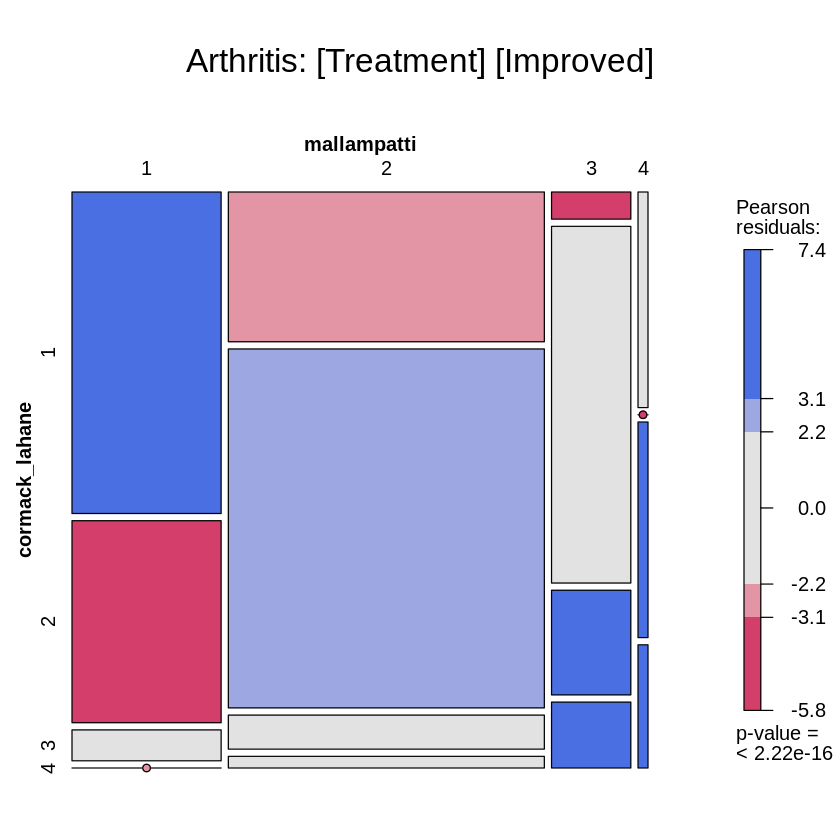

In [9]:
# prompt:  Write code to create mosaic plot to show strength of relationship between sex and cormack_lahane. Color it and also show legend with p value

# Load necessary library
library(vcd)

art <- xtabs(~mallampatti + cormack_lahane, data = df)


mosaic(art, gp = shading_max,
            split_vertical = TRUE,
             main="Arthritis: [Treatment] [Improved]")






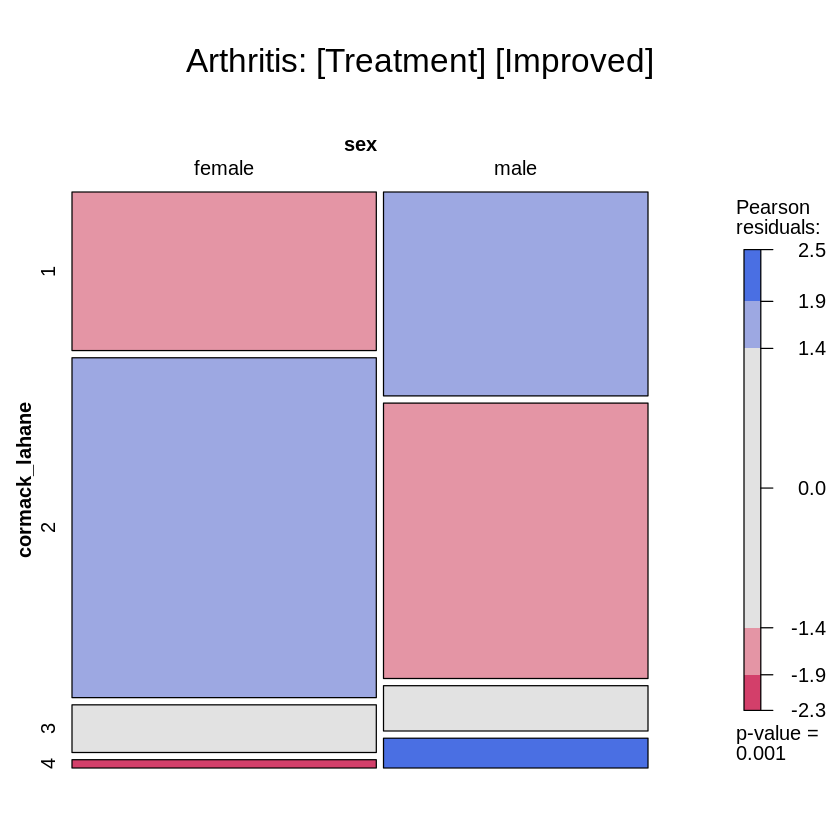

In [10]:
# prompt:  Write code to create mosaic plot to show strength of relationship between sex and cormack_lahane. Color it and also show legend with p value

# Load necessary library
library(vcd)

art <- xtabs(~sex + cormack_lahane, data = df)


mosaic(art, gp = shading_max,
            split_vertical = TRUE,
             main="Arthritis: [Treatment] [Improved]")






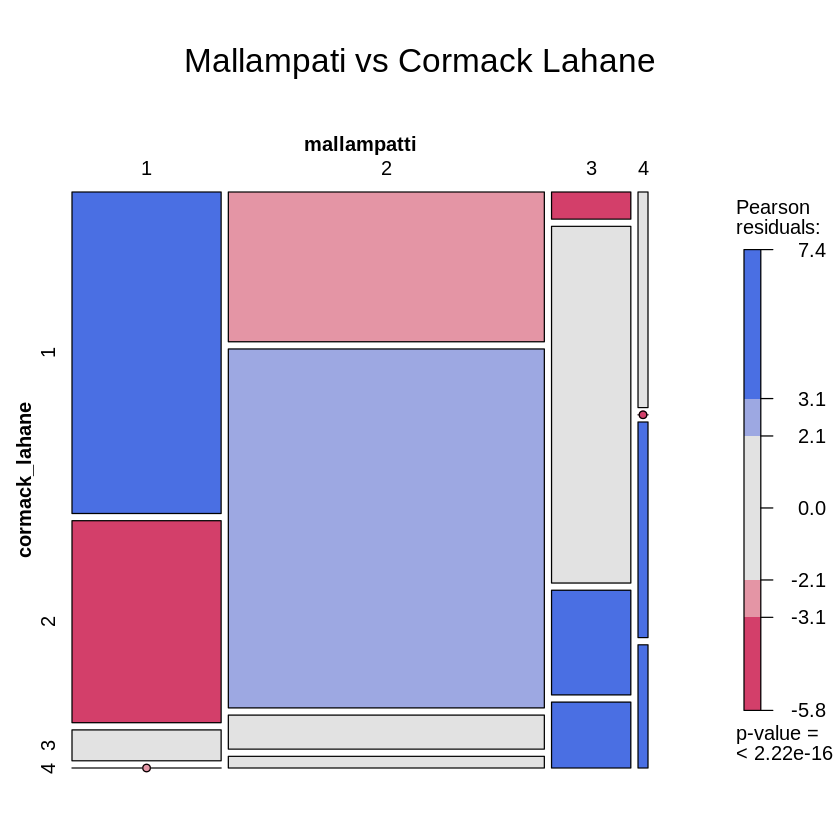

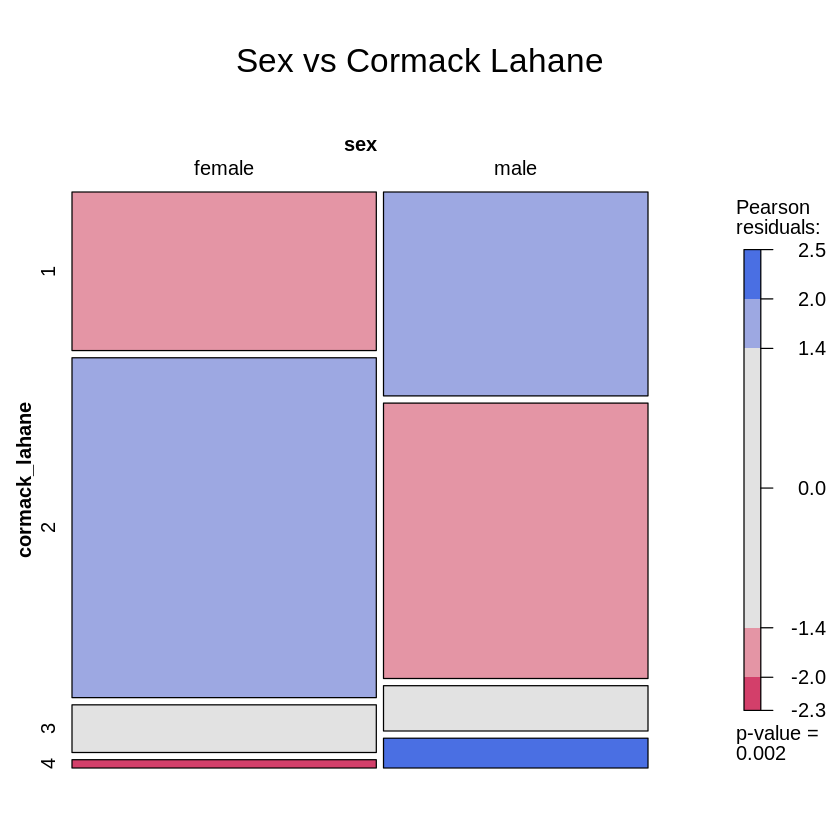

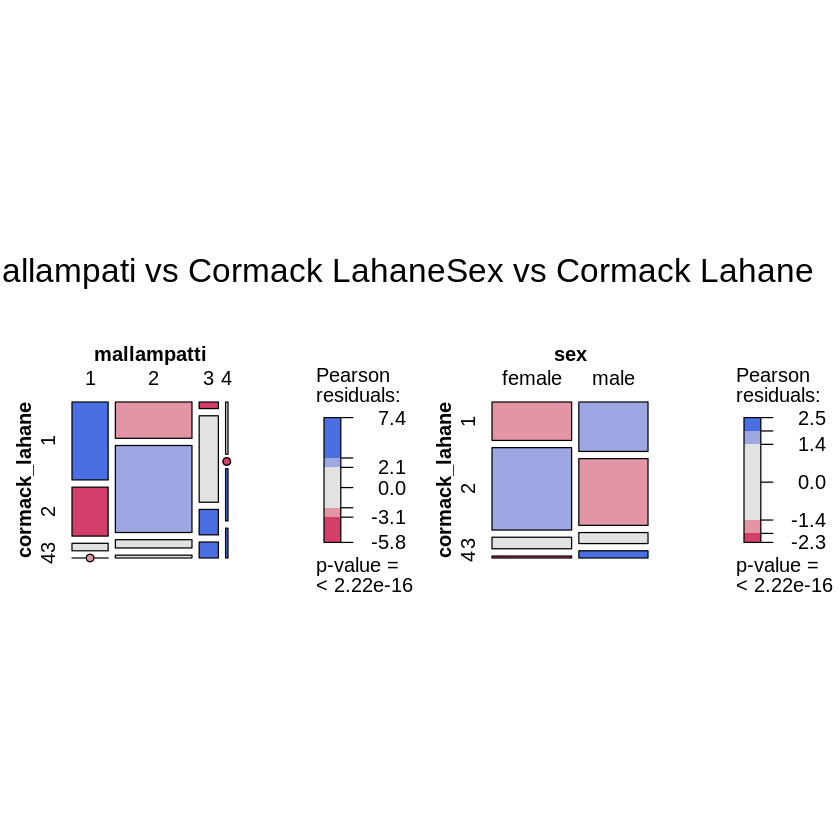

In [14]:
# prompt: Draw the above two mosaic plots side-by-side in one row

# Load necessary library
library(vcd)
library(gridExtra)
# Set up a 1x2 grid
par(mfrow = c(1, 2))

art1 <- xtabs(~mallampatti + cormack_lahane, data = df)
mosaic(art1, gp = shading_max, split_vertical = TRUE, main="Mallampati vs Cormack Lahane")


art2 <- xtabs(~sex + cormack_lahane, data = df)
mosaic(art2, gp = shading_max, split_vertical = TRUE, main="Sex vs Cormack Lahane")

grid.arrange(plot1, plot2, ncol=2)

Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”


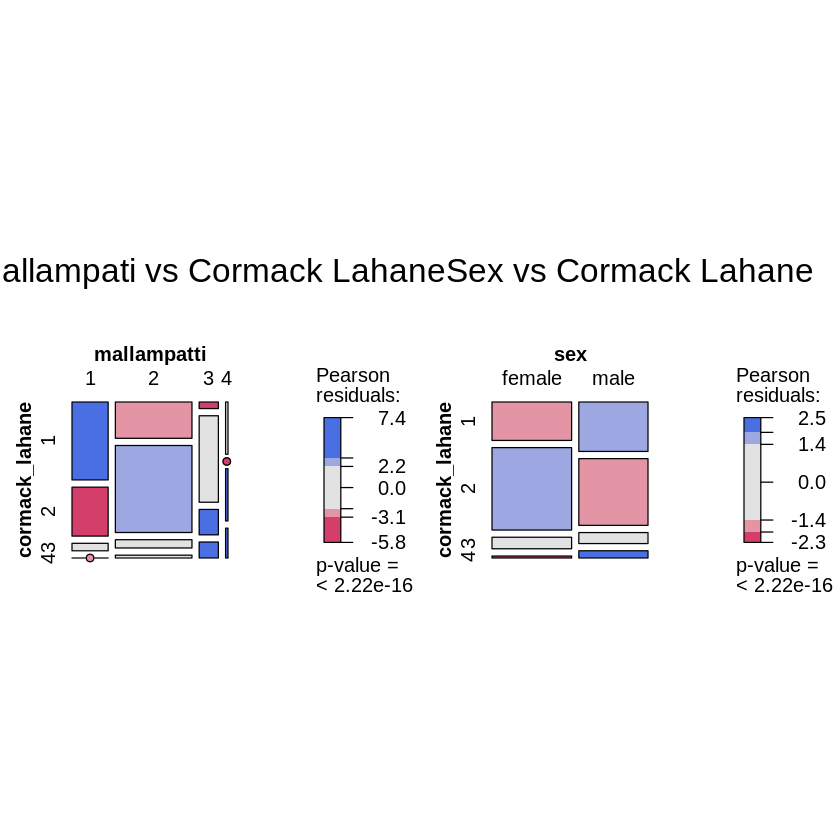

In [25]:
library(vcd)
library(gridExtra)
library(grid)


# Set up a 1x2 grid
par(mfrow = c(1, 2))
art1 <- xtabs(~mallampatti + cormack_lahane, data = df)
# Capture plot1 as a grob object
plot1 <- grid.grabExpr(mosaic(art1, gp = shading_max, split_vertical = TRUE, main="Mallampati vs Cormack Lahane"))


art2 <- xtabs(~sex + cormack_lahane, data = df)
# Capture plot2 as a grob object
plot2 <- grid.grabExpr(mosaic(art2, gp = shading_max, split_vertical = TRUE, main="Sex vs Cormack Lahane"))

a=grid.arrange(plot1, plot2, ncol=2)

Loading required package: grid

Loading required package: gnm



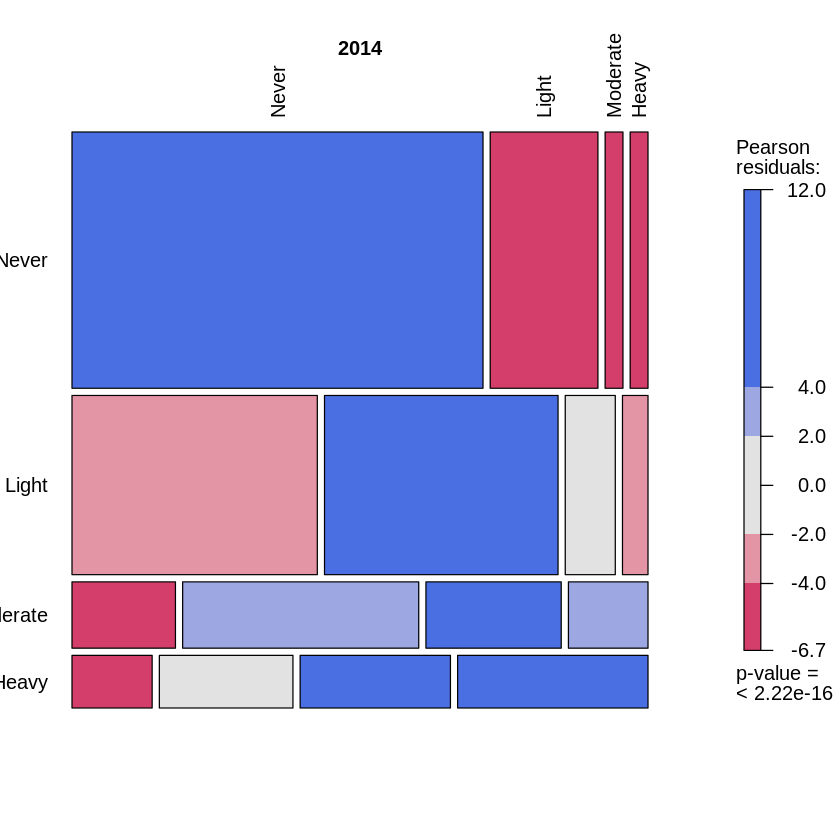

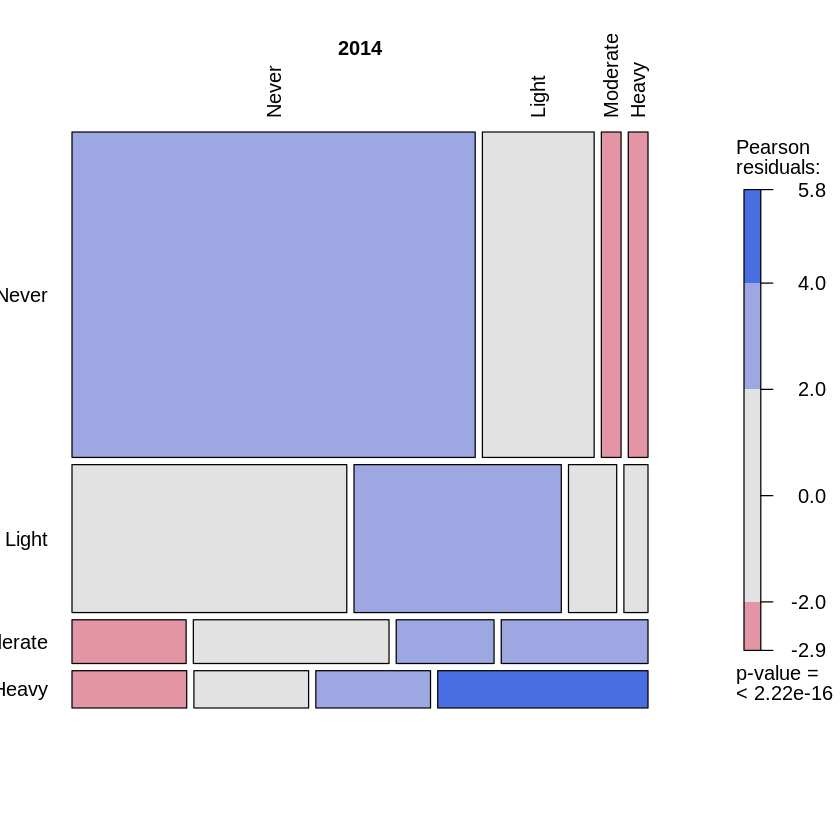

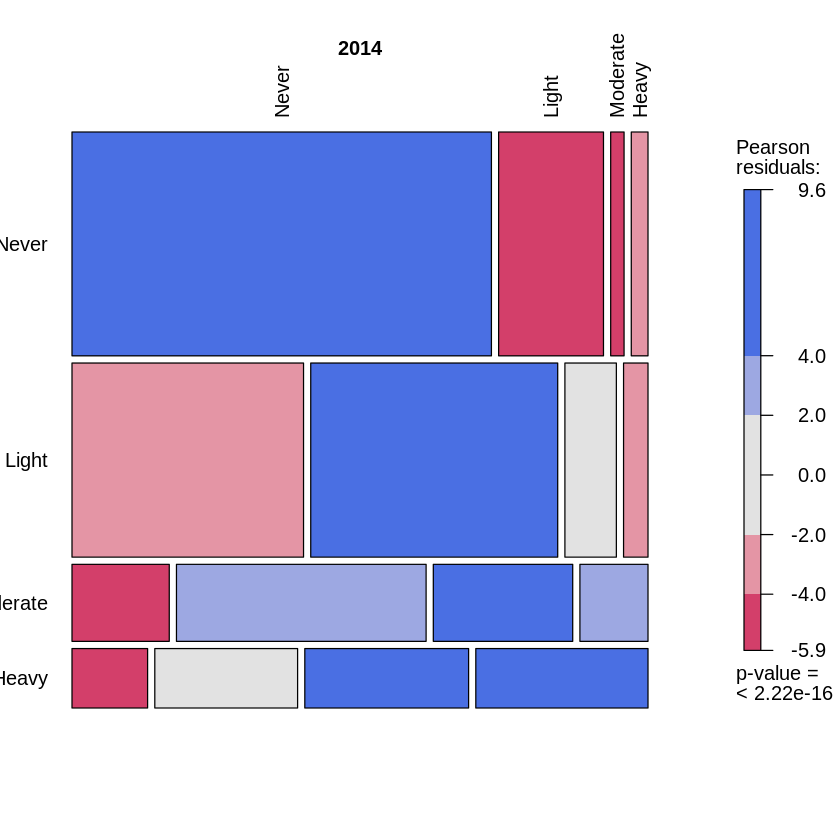

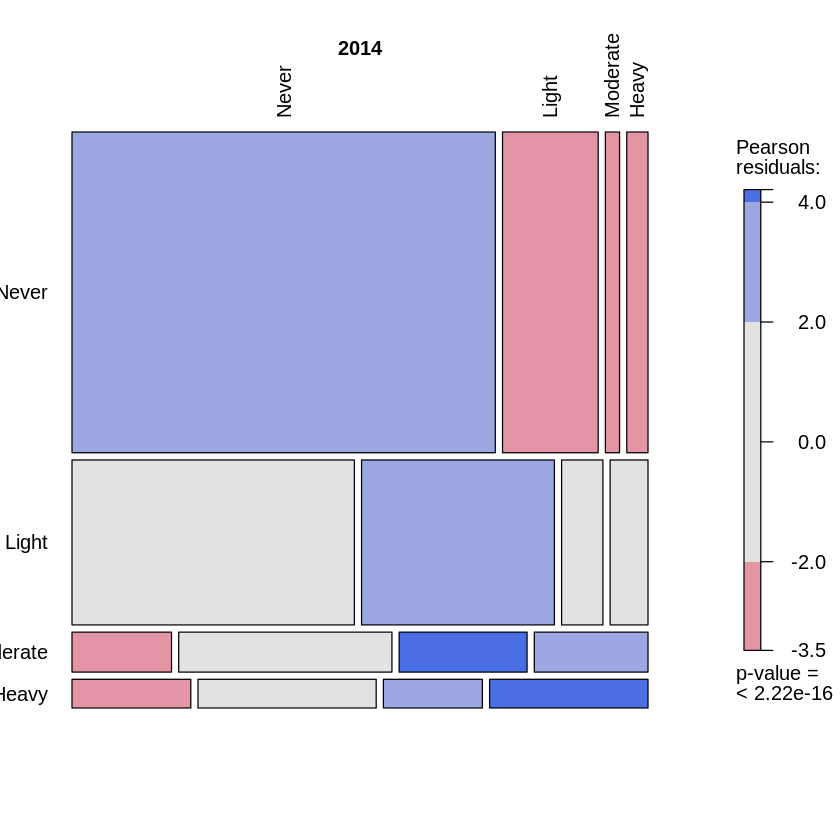

In [2]:
library(vcd)
library(vcdExtra)
library(MASS)

All <- matrix(c(599,250,39,24, 157,238,89,40, 26,51,51,45, 26,26,30,57), 4, 4)
dimnames(All) <- list("2002" =c("Never","Light","Moderate","Heavy"), "2014" =c("Never","Light","Moderate","Heavy"))
All <- as.table(All)

Poor <- matrix(c(184,57,7,6, 51,43,12,6, 9,10,6,6, 9,5,9,11), 4, 4)
dimnames(Poor) <- list("2002"=c("Never","Light","Moderate","Heavy"), "2014" =c("Never","Light","Moderate","Heavy"))
Poor <- as.table(Poor)

NonPoor <- matrix(c(376,180,30,18, 94,192,77,34, 12,40,43,39, 15,19,21,41), 4, 4)
dimnames(NonPoor) <- list("2002"=c("Never","Light","Moderate","Heavy"), "2014" =c("Never","Light","Moderate","Heavy"))
NonPoor <- as.table(NonPoor)

Black <- matrix(c(239,82,7,6, 54,56,15,9, 8,12,9,5, 12,11,8,8), 4, 4)
dimnames(Black) <- list("2002"=c("Never","Light","Moderate","Heavy"), "2014" =c("Never","Light","Moderate","Heavy"))
Black <- as.table(Black)

mosaic(All, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5))

mosaic(Poor, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5))

mosaic(NonPoor, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5))

mosaic(Black, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5))

Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”
Warning message in grabDL(warn, wrap, wrap.grobs, ...):
“viewport overwritten (grab MAY not be faithful)”


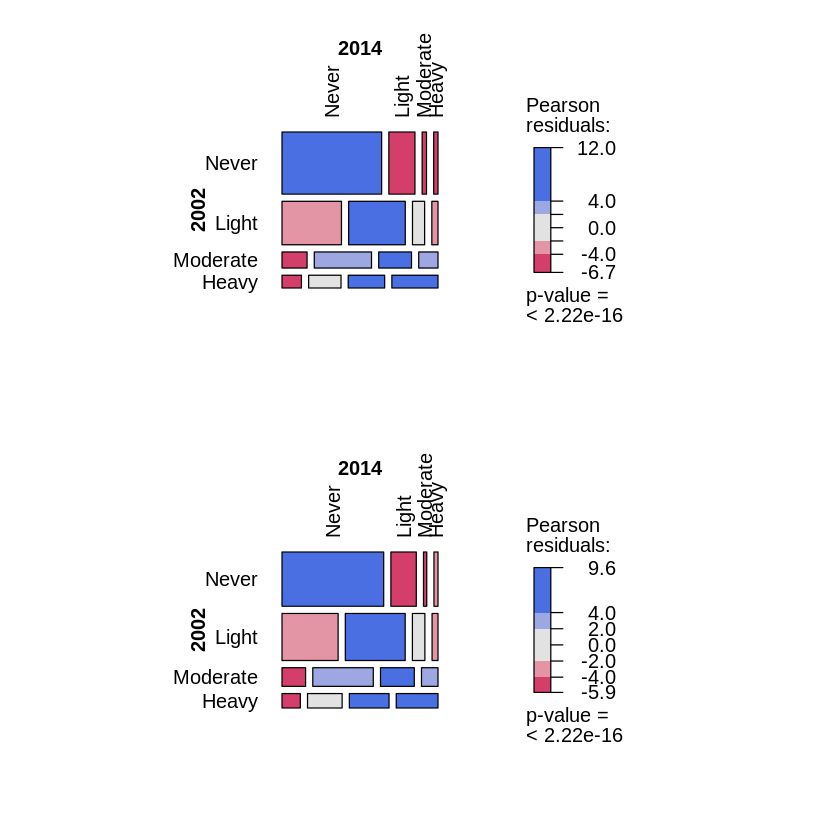

In [5]:
library(gridExtra)

fig1<-grid.grabExpr(mosaic(All, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5)))
fig2<-grid.grabExpr(mosaic(Poor, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5)))
fig3<-grid.grabExpr(mosaic(NonPoor, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5)))
fig4<-grid.grabExpr(mosaic(Black, shade = TRUE, rot_labels = c(top = 90, left=0),just_labels = c("left","right","right","right"),offset_labels = c(-.4, 0, 0, 0),offset_varnames = c(1.5, 0, 0, 1.5)))



grid.arrange(fig1,fig3)



In [28]:
library(ggmosaic)
library(gridExtra)
library(dplyr)
#library(ggstatsplot)  # or ggirtools, see note below
library(ggirtools)

ERROR: Error in library(ggirtools): there is no package called ‘ggirtools’


In [ ]:
library(ggmosaic)
library(gridExtra)
library(dplyr)
library(ggstatsplot)  # or ggirtools, see note below